**Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_excel('/content/data_cleaning.xlsx', sheet_name=1, header = None)
df.head()

,0
0,3 PM Mon 24th-Mar-2014___0.384 kwh
1,5AM 15-Aug-2014___1.201 kwh
2,__8PM Thu 20-Mar-2014____1.523 kwh
3,6PM 23rd-Apr-2014___0.424 kwh
4,_1AM Friday 19th-Dec-2014___0.209 kwh


In [3]:
df.tail()

,0
8755,_1AM Fri 07th-Nov-2014_0.084 kwh
8756,_6AM 20-May-2014__1.027 kwh
8757,__2 AM Tuesday 8th-Apr-2014___0.052 kwh
8758,9 PM 27th-Jan-2014_1.428 kwh
8759,_12 PM 25th-Aug-2014_0.528 kwh


In [4]:
import warnings
warnings.filterwarnings(action = "ignore")
plt.rcParams["figure.figsize"] = (12,8)

**Creating lists**

In [5]:
AMPM = []
Day = []
Month =[]
Year = []
KWH = []
EXP = []
valid = True
for x in df[0] : 
    pattern_ampm = "AM|PM"  # Pattern fot AM_PM
    AMPM.append(re.findall(pattern_ampm , x)) # Appending to our list
    Month.append(x.split('-')[1]) # Adding month to the list
    Year.append(int(x.split('-')[2].split("__")[0].split("_")[0])) # Adding Years to the list
    Day.append(int(x.split('-')[0][-4:].replace(" " , "").replace("th" , "").replace("rd" , "").replace("st" , "").replace("nd","").replace("y" , "").replace("n", "").replace("u" , "").replace("M" , "").replace("d" , "").replace("i" , "").replace("t" , "").replace("e" , "").replace("P" , "").replace("o" ,"").replace("h" , "").replace("a" , "").replace("A" , "").replace("r"  ,"")))
    EXP.append(np.where(valid , "kwh" , 0)) # Adding KVH to the list
    pattern = "\s?[0-9]+\.[0-9]+" # pattern for KWH
    KWH.append(re.findall(pattern , x))

**Applying regex for extracting hours from the data**

In [6]:
ls_1 = []
for x in df[0] :
    pattern = '\s?[0-9]+\s?[A-Z]+'
    ls_1.append(re.findall(pattern , x))
ls_2 = []
for x in ls_1 :
    for i in x :
        ls_2.append(int(i.replace('PM' , '').replace('AM' , '').strip()))

**Combining all created lists for creating Data Frame**

In [7]:
df_new = pd.DataFrame(data = ls_2 , columns = ['Hour'])
df_new = pd.concat([df_new , pd.DataFrame(data = AMPM , columns = ['AMPM'])], axis = 1)
df_new = pd.concat([df_new , pd.DataFrame(data = Month , columns = ['Month'])] , axis = 1)
df_new = pd.concat([df_new , pd.DataFrame(data = Year , columns = ['Year'])] , axis = 1)
df_new = pd.concat([df_new , pd.DataFrame(data = Day , columns = ['Day'])] , axis = 1)
df_new = pd.concat([df_new , pd.DataFrame(data = KWH , columns = ['KWH'])] , axis = 1)
df_new = pd.concat([df_new , pd.DataFrame(data = EXP , columns = ['EXP'])] , axis = 1)

**Creating date column with combining Year, Month and Day**

In [8]:
date_list = []
for x in range(0,8760) :
    date_list.append(str(df_new['Year'][x])+ '-' + df_new['Month'][x] + '-' + str(df_new['Day'][x]))
    
df_new = pd.concat([df_new , pd.DataFrame(data = date_list , columns = ['Date'])] , axis = 1)
df_new.head()

,Hour,AMPM,Month,Year,Day,KWH,EXP,Date
0,3,PM,Mar,2014,24,0.384,kwh,2014-Mar-24
1,5,AM,Aug,2014,15,1.201,kwh,2014-Aug-15
2,8,PM,Mar,2014,20,1.523,kwh,2014-Mar-20
3,6,PM,Apr,2014,23,0.424,kwh,2014-Apr-23
4,1,AM,Dec,2014,19,0.209,kwh,2014-Dec-19


**Converting Dtypes**

In [9]:
df_new['Date'] = pd.to_datetime(df_new['Date'] , yearfirst = True)
df_new['Year'] = df_new['Year'].astype('int')
df_new['Day'] = df_new['Day'].astype('int')
df_new['KWH'] = df_new['KWH'].astype('float')
df_new.head()

,Hour,AMPM,Month,Year,Day,KWH,EXP,Date
0,3,PM,Mar,2014,24,0.384,kwh,2014-03-24
1,5,AM,Aug,2014,15,1.201,kwh,2014-08-15
2,8,PM,Mar,2014,20,1.523,kwh,2014-03-20
3,6,PM,Apr,2014,23,0.424,kwh,2014-04-23
4,1,AM,Dec,2014,19,0.209,kwh,2014-12-19


**Adding the name of the days with the help of the day_name function**

In [10]:
df_new['Day_Name'] = df_new['Date'].dt.day_name()
df_new.head()

,Hour,AMPM,Month,Year,Day,KWH,EXP,Date,Day_Name
0,3,PM,Mar,2014,24,0.384,kwh,2014-03-24,Monday
1,5,AM,Aug,2014,15,1.201,kwh,2014-08-15,Friday
2,8,PM,Mar,2014,20,1.523,kwh,2014-03-20,Thursday
3,6,PM,Apr,2014,23,0.424,kwh,2014-04-23,Wednesday
4,1,AM,Dec,2014,19,0.209,kwh,2014-12-19,Friday


In [11]:
df_new['KWH_Month'] = range(0,8760)
df_new.loc[df_new['Month']=='Jan' , 'KWH_Month'] = df_new['KWH']*0.20
df_new.loc[df_new['Month']=='Feb' , 'KWH_Month'] = df_new['KWH']*0.19
df_new.loc[df_new['Month']=='Mar' , 'KWH_Month'] = df_new['KWH']*0.17
df_new.loc[df_new['Month']=='Apr' , 'KWH_Month'] = df_new['KWH']*0.18
df_new.loc[df_new['Month']=='May' , 'KWH_Month'] = df_new['KWH']*0.22
df_new.loc[df_new['Month']=='Jun' , 'KWH_Month'] = df_new['KWH']*0.27
df_new.loc[df_new['Month']=='Jul' , 'KWH_Month'] = df_new['KWH']*0.24
df_new.loc[df_new['Month']=='Aug' , 'KWH_Month'] = df_new['KWH']*0.19
df_new.loc[df_new['Month']=='Sep' , 'KWH_Month'] = df_new['KWH']*0.18
df_new.loc[df_new['Month']=='Oct' , 'KWH_Month'] = df_new['KWH']*0.15
df_new.loc[df_new['Month']=='Nov' , 'KWH_Month'] = df_new['KWH']*0.14
df_new.loc[df_new['Month']=='Dec' , 'KWH_Month'] = df_new['KWH']*0.19

In [12]:
df_new["KWH_Day"] = range(0,8760)
df_new.loc[(df_new["Hour"] == 12)&(df_new["AMPM"] == "AM"), "KWH_Day"] = df_new["KWH"]*0.10
df_new.loc[(df_new["Hour"] == 1)&(df_new["AMPM"] == "AM") , "KWH_Day"] = df_new["KWH"]*0.10
df_new.loc[(df_new["Hour"] == 2)&(df_new["AMPM"] == "AM") , "KWH_Day"] = df_new["KWH"]*0.10
df_new.loc[(df_new["Hour"] == 3)&(df_new["AMPM"] == "AM") , "KWH_Day"] = df_new["KWH"]*0.10
df_new.loc[(df_new["Hour"] == 4)&(df_new["AMPM"] == "AM") , "KWH_Day"] = df_new["KWH"]*0.15
df_new.loc[(df_new["Hour"] == 5)&(df_new["AMPM"] == "AM") , "KWH_Day"] = df_new["KWH"]*0.20
df_new.loc[(df_new["Hour"] == 6)&(df_new["AMPM"] == "AM") , "KWH_Day"] = df_new["KWH"]*0.24
df_new.loc[(df_new["Hour"] == 7)&(df_new["AMPM"] == "AM") , "KWH_Day"] = df_new["KWH"]*0.24
df_new.loc[(df_new["Hour"] == 8)&(df_new["AMPM"] == "AM") , "KWH_Day"] = df_new["KWH"]*0.26
df_new.loc[(df_new["Hour"] == 9)&(df_new["AMPM"] == "AM") , "KWH_Day"] = df_new["KWH"]*0.20
df_new.loc[(df_new["Hour"] == 10)&(df_new["AMPM"] == "AM") , "KWH_Day"] = df_new["KWH"]*0.20
df_new.loc[(df_new["Hour"] == 11)&(df_new["AMPM"] == "AM") , "KWH_Day"] = df_new["KWH"]*0.26

df_new.loc[(df_new["Hour"] == 12)&(df_new["AMPM"] == "PM"), "KWH_Day"] = df_new["KWH"]*0.26
df_new.loc[(df_new["Hour"] == 1)&(df_new["AMPM"] == "PM") , "KWH_Day"] = df_new["KWH"]*0.20
df_new.loc[(df_new["Hour"] == 2)&(df_new["AMPM"] == "PM") , "KWH_Day"] = df_new["KWH"]*0.24
df_new.loc[(df_new["Hour"] == 3)&(df_new["AMPM"] == "PM") , "KWH_Day"] = df_new["KWH"]*0.18
df_new.loc[(df_new["Hour"] == 4)&(df_new["AMPM"] == "PM") , "KWH_Day"] = df_new["KWH"]*0.15
df_new.loc[(df_new["Hour"] == 5)&(df_new["AMPM"] == "PM") , "KWH_Day"] = df_new["KWH"]*0.30
df_new.loc[(df_new["Hour"] == 6)&(df_new["AMPM"] == "PM") , "KWH_Day"] = df_new["KWH"]*0.24
df_new.loc[(df_new["Hour"] == 7)&(df_new["AMPM"] == "PM") , "KWH_Day"] = df_new["KWH"]*0.24
df_new.loc[(df_new["Hour"] == 8)&(df_new["AMPM"] == "PM") , "KWH_Day"] = df_new["KWH"]*0.12
df_new.loc[(df_new["Hour"] == 9)&(df_new["AMPM"] == "PM") , "KWH_Day"] = df_new["KWH"]*0.11
df_new.loc[(df_new["Hour"] == 10)&(df_new["AMPM"] == "PM") , "KWH_Day"] = df_new["KWH"]*0.10
df_new.loc[(df_new["Hour"] == 11)&(df_new["AMPM"] == "PM") , "KWH_Day"] = df_new["KWH"]*0.10

In [13]:
df_new['KWH_Year'] = df_new['KWH']*0.21

In [14]:
df_new.head()

,Hour,AMPM,Month,Year,Day,KWH,EXP,Date,Day_Name,KWH_Month,KWH_Day,KWH_Year
0,3,PM,Mar,2014,24,0.384,kwh,2014-03-24,Monday,0.06528,0.06912,0.08064
1,5,AM,Aug,2014,15,1.201,kwh,2014-08-15,Friday,0.22819,0.24020,0.25221
2,8,PM,Mar,2014,20,1.523,kwh,2014-03-20,Thursday,0.25891,0.18276,0.31983
3,6,PM,Apr,2014,23,0.424,kwh,2014-04-23,Wednesday,0.07632,0.10176,0.08904
4,1,AM,Dec,2014,19,0.209,kwh,2014-12-19,Friday,0.03971,0.02090,0.04389


Question 1: What is your average hourly electricity usage?
Answer: B

In [15]:
np.round(np.average(df_new["KWH"]),3)

0.782

Question 2: What is your average electricity usage per hour in February?
Answer: D

In [16]:
np.round(np.average(df_new.loc[df_new["Month"]=="Feb" , "KWH"]),3)

0.834

Question 3: Which day of the week has the
highest average usage?
Answer: A

In [17]:
df_new.groupby(by = ["Day_Name"])["KWH"].mean().to_frame().sort_values(by = ["KWH"] , ascending = False)

,KWH
Day_Name,
Sunday,0.898601
Saturday,0.890300
Friday,0.753666
Thursday,0.746375
Wednesday,0.733699
Monday,0.725894
Tuesday,0.724843


Question 4: What is the highest amount of
electricity used in a continuous 4 hour
period?

In [18]:
df_new = df_new.sort_values(by = ["Date"] , ascending = True)
df_new_2 = df_new[["Hour" , "KWH"]]
df_new_2 = df_new_2.set_index(df_new_2["Hour"]).drop(columns = ["Hour"])
df_new_2["KWH"].rolling(4).sum().sort_values(ascending = False)

Hour
7     14.689
7     14.036
7     13.977
6     13.935
2     13.495
       ...  
12     0.310
4      0.280
6        NaN
8        NaN
3        NaN
Name: KWH, Length: 8760, dtype: float64

Question 5: What is the highest amount of electricity used in a continuous 4 hour
period?
Answer: B

In [19]:
sum(df_new["KWH_Month"])

1421.2057700000403

Question 6: Based on your historic electricity
usage, which of the three contracts
would pro- duce the lowest annual
cost?
Answer: C

In [20]:
print("The Hourly flex plan is : {}".format(sum(df_new["KWH_Day"])))
print("The Montly Flex plan is : {}".format(sum(df_new["KWH_Month"])))
print("The No Flex plan is {}".format(sum(df_new["KWH_Year"])))

The Hourly flex plan is : 1368.9764700000032
The Montly Flex plan is : 1421.2057700000403
The No Flex plan is 1438.1039399999993


**Creating time series model**

In [21]:
df_new.head()

,Hour,AMPM,Month,Year,Day,KWH,EXP,Date,Day_Name,KWH_Month,KWH_Day,KWH_Year
4837,6,PM,Jan,2014,1,2.856,kwh,2014-01-01,Wednesday,0.5712,0.68544,0.59976
6515,8,AM,Jan,2014,1,0.656,kwh,2014-01-01,Wednesday,0.1312,0.17056,0.13776
4106,3,AM,Jan,2014,1,0.396,kwh,2014-01-01,Wednesday,0.0792,0.03960,0.08316
6633,11,PM,Jan,2014,1,1.130,kwh,2014-01-01,Wednesday,0.2260,0.11300,0.23730
1815,5,AM,Jan,2014,1,2.354,kwh,2014-01-01,Wednesday,0.4708,0.47080,0.49434


In [22]:
df_new.isnull().sum()

Hour         0
AMPM         0
Month        0
Year         0
Day          0
KWH          0
EXP          0
Date         0
Day_Name     0
KWH_Month    0
KWH_Day      0
KWH_Year     0
dtype: int64

**Heatmap for checking null values**

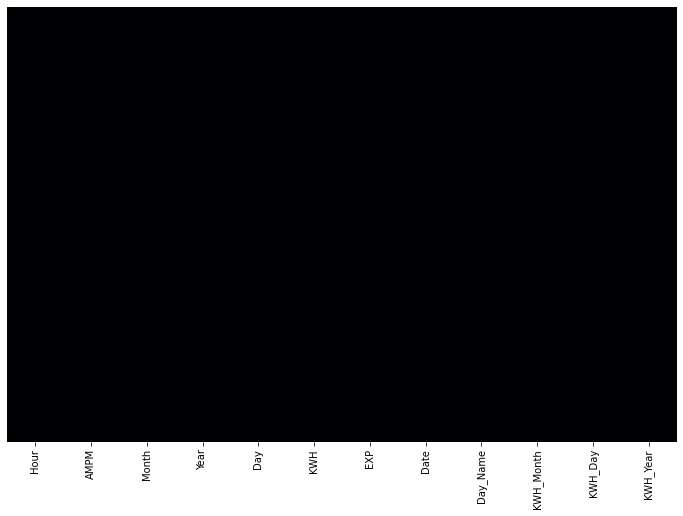

In [23]:
sns.heatmap(data = df_new.isnull() , cmap = "magma" , cbar = False , yticklabels=False)
plt.show()

In [24]:
print("Before there are {} duplicate values in the dataset".format(df_new.duplicated().sum()) )
df_new.drop_duplicates(inplace = True)
print("Then there are {} duplicate values in the dataset".format(df_new.duplicated().sum()))

Before there are 6 duplicate values in the dataset
Then there are 0 duplicate values in the dataset


In [25]:
df_new = df_new.sort_values(by = ["Date"] , ascending=True , ignore_index=True)
df_new.head()

,Hour,AMPM,Month,Year,Day,KWH,EXP,Date,Day_Name,KWH_Month,KWH_Day,KWH_Year
0,6,PM,Jan,2014,1,2.856,kwh,2014-01-01,Wednesday,0.5712,0.68544,0.59976
1,12,AM,Jan,2014,1,0.684,kwh,2014-01-01,Wednesday,0.1368,0.06840,0.14364
2,4,AM,Jan,2014,1,0.388,kwh,2014-01-01,Wednesday,0.0776,0.05820,0.08148
3,10,AM,Jan,2014,1,0.952,kwh,2014-01-01,Wednesday,0.1904,0.19040,0.19992
4,10,PM,Jan,2014,1,1.200,kwh,2014-01-01,Wednesday,0.2400,0.12000,0.25200


In [26]:
df_main = df_new[["Date" , "KWH"]]
df_main = df_main.set_index("Date")
df_main.head()

,KWH
Date,
2014-01-01,2.856
2014-01-01,0.684
2014-01-01,0.388
2014-01-01,0.952
2014-01-01,1.200


In [27]:
import plotly.express as px
px.line(df_main)

In [28]:
from prophet import Prophet
df_main = df_main.reset_index()
df_main.rename(columns = {"Date" : "ds" , "KWH" : "y"} , inplace = True)
data_main_model = Prophet(interval_width=0.95)
data_main_model.fit(df_main)

timeseries_forecast = data_main_model.make_future_dataframe(periods=30, freq='D')
y_pred = data_main_model.predict(timeseries_forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaq67kiro/yp23m35y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaq67kiro/9y5dcj6e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22236', 'data', 'file=/tmp/tmpaq67kiro/yp23m35y.json', 'init=/tmp/tmpaq67kiro/9y5dcj6e.json', 'output', 'file=/tmp/tmpzzm7jlna/prophet_model-20220827135553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:55:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:55:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Predictions**

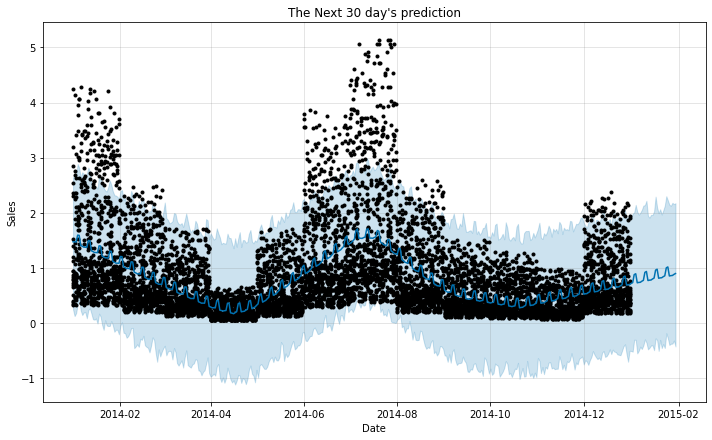

In [29]:
data_main_model.plot(y_pred, xlabel = 'Date', ylabel = 'Sales')
plt.title("The Next 30 day's prediction")
plt.show()

**Visualize components of time-series**

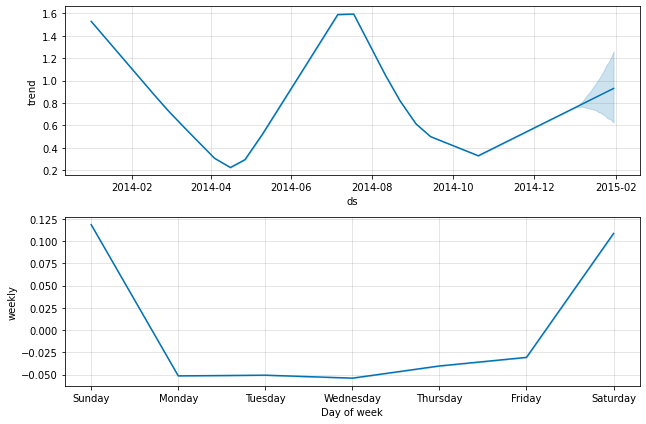

In [30]:
data_main_model.plot_components(y_pred);